# **0. Introduction and Objectives:**

### Project Goal: to use machine learning to create a model that predicts which passengers survived the Titanic shipwreck while analysing differnt factors that led to our predictor to achive this result

# **1. Data loading**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:

data=pd.read_csv("/kaggle/input/titanic/train_and_test2.csv")
data.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


# **2. Exploratory Data Analysis**

## **2.0 EDA Objectives: Titanic Survivor Predictor**

The primary goal of this Exploratory Data Analysis (EDA) is to thoroughly understand the Titanic dataset in preparation for building a model that can predict passenger survival. Specifically, this EDA aims to:

* **Understand the Characteristics of Each Feature:**
    * Analyze the distribution, central tendency, and spread of individual features such as `PassengerId`, `Survived`, `Pclass`, `Name`, `Sex`, `Age`, `SibSp`, `Parch`, `Ticket`, `Fare`, `Cabin`, and `Embarked`.
    * Identify the data type of each feature and any potential inconsistencies.
    * Gain an initial understanding of the range and variability of values within each feature.

* **Identify Missing Values and Outliers:**
    * Determine the presence and extent of missing data in each column.
    * Analyze the patterns of missingness to understand if it's random or related to other features.
    * Detect potential outliers in numerical features like `Age` and `Fare` that might require further investigation or handling.

* **Explore Relationships Between Features:**
    * Investigate the relationships between different passenger features (e.g., `Pclass` and `Fare`, `Age` and `Pclass`, `SibSp` and `Parch`).
    * Analyze correlations between numerical features to identify potential dependencies.
    * Examine the relationship between categorical features using cross-tabulations.

* **Gain Insights into the Target Variable (`Survived`):**
    * Determine the overall survival rate in the dataset.
    * Analyze the distribution of survivors and non-survivors across different passenger demographics and characteristics (e.g., by `Sex`, `Pclass`, `Age`, `Embarked`).

* **Formulate Initial Hypotheses About Potential Predictors of Survival:**
    * Based on the observed relationships, develop initial hypotheses about which features are likely to be strong predictors of survival. For example, "Passengers in higher classes had a higher survival rate," or "Female passengers were more likely to survive."

* **Identify Potential Data Quality Issues:**
    * Uncover any inconsistencies, errors, or unusual patterns in the data that might need to be addressed during data preprocessing. This could include inconsistent formatting, illogical values, or data entry errors.

In [3]:
data.tail()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
1304,1305,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1305,1306,39.0,108.9000,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,0
1306,1307,38.5,7.2500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1307,1308,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1308,1309,28.0,22.3583,0,1,0,0,0,0,0,...,0,0,0,3,0,0,0.0,0,0,0


In [4]:
data.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17',
       'zero.18', '2urvived'],
      dtype='object')

Data Dictionary

    Passengerid: Unique identifier for each passenger.
    Age: Age of the passenger.
    Fare: Fare paid by the passenger.
    Sex: Gender of the passenger.
    sibsp: Number of siblings/spouses aboard.
    zero: Placeholder column (potentially unused or for future data).
    zero.1: Placeholder column.
    zero.2: Placeholder column.
    zero.3: Placeholder column.
    zero.4: Placeholder column.
    zero.5: Placeholder column.
    zero.6: Placeholder column.
    Parch: Number of parents/children aboard.
    zero.7: Placeholder column.
    zero.8: Placeholder column.
    zero.9: Placeholder column.
    zero.10: Placeholder column.
    zero.11: Placeholder column.
    zero.12: Placeholder column.
    zero.13: Placeholder column.
    zero.14: Placeholder column.
    Pclass: Passenger class (1st, 2nd, or 3rd).
    zero.15: Placeholder column.
    zero.16: Placeholder column.
    Embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton).
    zero.17: Placeholder column.
    zero.18: Placeholder column.
    2urvived: Survival status (0 = No; 1 = Yes).


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

In [6]:
data.describe()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.0,1309.0,1309.0,1309.0,1309.0,...,1309.0,1309.0,1309.0,1309.000000,1309.0,1309.0,1307.000000,1309.0,1309.0,1309.000000
mean,655.000000,29.503186,33.281086,0.355997,0.498854,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.294882,0.0,0.0,1.492731,0.0,0.0,0.261268
std,378.020061,12.905241,51.741500,0.478997,1.041658,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.837836,0.0,0.0,0.814626,0.0,0.0,0.439494
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
25%,328.000000,22.000000,7.895800,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.000000,0.0,0.0,1.000000,0.0,0.0,0.000000
50%,655.000000,28.000000,14.454200,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,0.000000
75%,982.000000,35.000000,31.275000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000
max,1309.000000,80.000000,512.329200,1.000000,8.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000


In [7]:
data["Sex"].nunique()

2

In [8]:
data["Passengerid"].nunique()

1309

In [9]:
data.isnull().sum().sum()

2

### unitial evaluation
_ the initial  tell us some information on age, fare and PassengerID
  1. on age: the min age 0.17 ,tell us the on board there a newborn in ship and there were also an old man of 80 years old.
  2. on fare: the is a high gap  and high disproportion on price , there were also those who were not charged likely the the board crew.
  3. On PassengerID: the high cardinality of it tell us that it won't be helpfull to include it in our next investigation
we will have to deep dive in each feature ,especially caterigocal features
-we found also two nulls valus in embark feature that will have to  be dealt with
-there are also zero.(0-18) that we don't have any clue about

## **2.2 Univariante analysis**

In [10]:
df=data.copy()

## **2.2.0 Univariante analysis for numerical values**

--- Analyzing Age ---


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


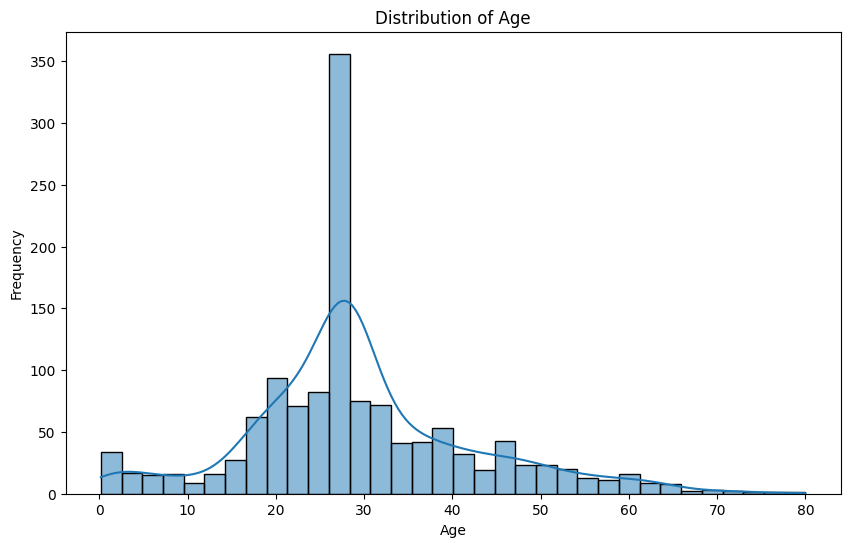

In [11]:
print("--- Analyzing Age ---")
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


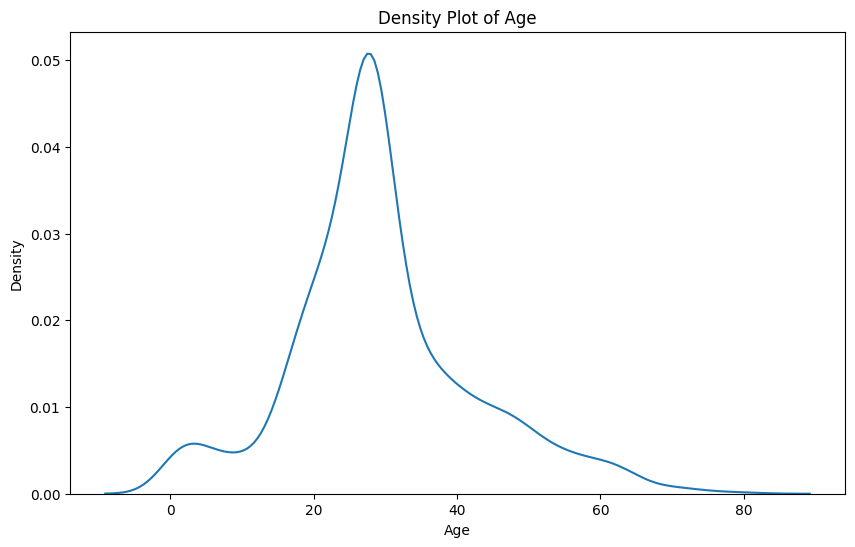

In [12]:
# Density Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Age'])
plt.title('Density Plot of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

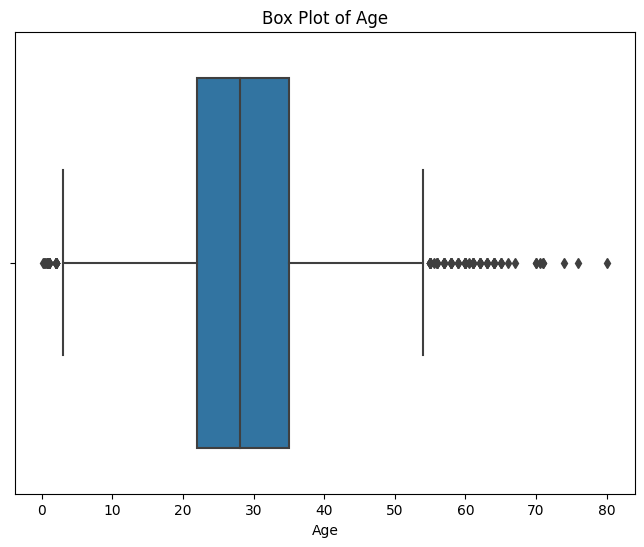

In [13]:
# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'])
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()


--- Analyzing Fare ---


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


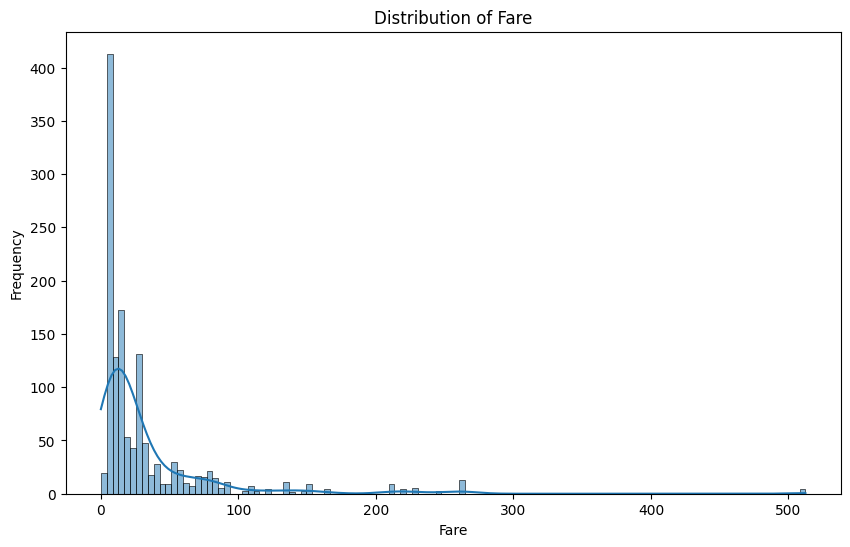

In [14]:
print("\n--- Analyzing Fare ---")
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


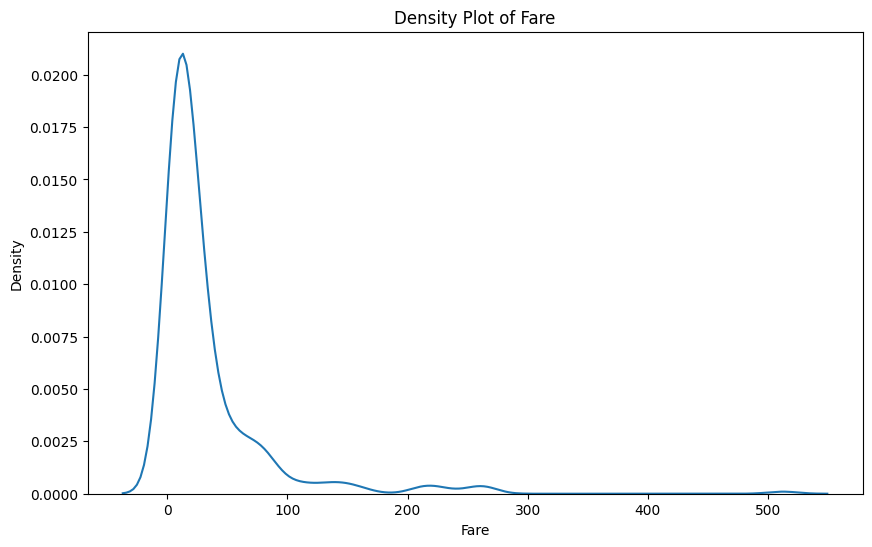

In [15]:
# Density Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Fare'])
plt.title('Density Plot of Fare')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.show()


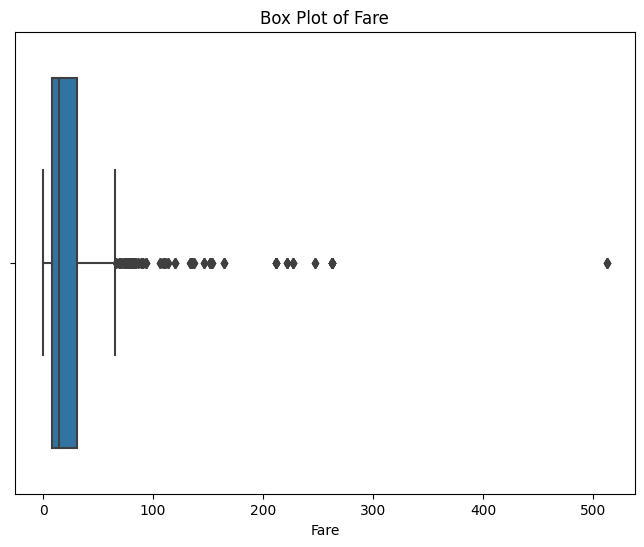

In [16]:
# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Fare'])
plt.title('Box Plot of Fare')
plt.xlabel('Fare')
plt.show()


--- Analyzing sibsp (Number of Siblings/Spouses Aboard) ---

Value Counts for sibsp:
sibsp
0    891
1    319
2     42
3     20
4     22
5      6
8      9
Name: count, dtype: int64


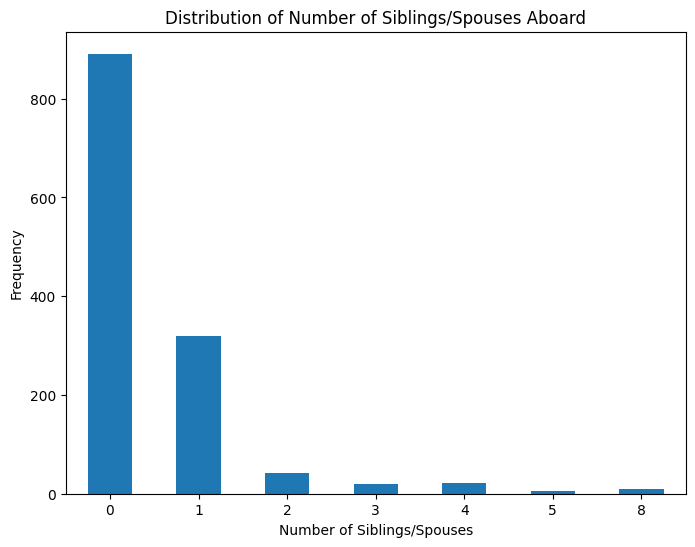

In [17]:
print("\n--- Analyzing sibsp (Number of Siblings/Spouses Aboard) ---")
# Value Counts
print("\nValue Counts for sibsp:")
print(df['sibsp'].value_counts().sort_index())

# Bar Chart
plt.figure(figsize=(8, 6))
df['sibsp'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Number of Siblings/Spouses Aboard')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()



--- Analyzing Parch (Number of Parents/Children Aboard) ---

Value Counts for Parch:
Parch
0    1002
1     170
2     113
3       8
4       6
5       6
6       2
9       2
Name: count, dtype: int64


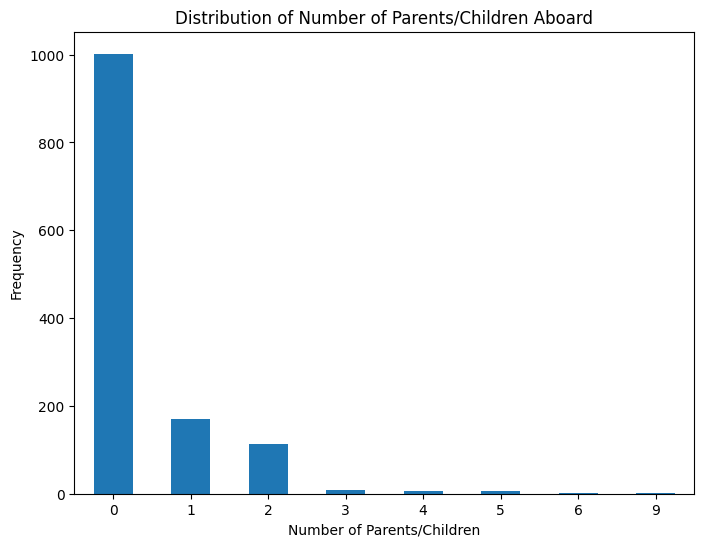


--- Summary Statistics for Age, Fare, sibsp, and Parch ---
               Age         Fare        sibsp        Parch
count  1309.000000  1309.000000  1309.000000  1309.000000
mean     29.503186    33.281086     0.498854     0.385027
std      12.905241    51.741500     1.041658     0.865560
min       0.170000     0.000000     0.000000     0.000000
25%      22.000000     7.895800     0.000000     0.000000
50%      28.000000    14.454200     0.000000     0.000000
75%      35.000000    31.275000     1.000000     0.000000
max      80.000000   512.329200     8.000000     9.000000


In [18]:
print("\n--- Analyzing Parch (Number of Parents/Children Aboard) ---")
# Value Counts
print("\nValue Counts for Parch:")
print(df['Parch'].value_counts().sort_index())

# Bar Chart
plt.figure(figsize=(8, 6))
df['Parch'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Number of Parents/Children Aboard')
plt.xlabel('Number of Parents/Children')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

print("\n--- Summary Statistics for Age, Fare, sibsp, and Parch ---")
print(df[['Age', 'Fare', 'sibsp', 'Parch']].describe())

## **2.2.1 Univariante analysis for categorical value**

In [19]:
print("--- Analyzing Sex ---")
print("\n proportionality on sex features :",df["Sex"].value_counts())


--- Analyzing Sex ---

 proportionality on sex features : Sex
0    843
1    466
Name: count, dtype: int64


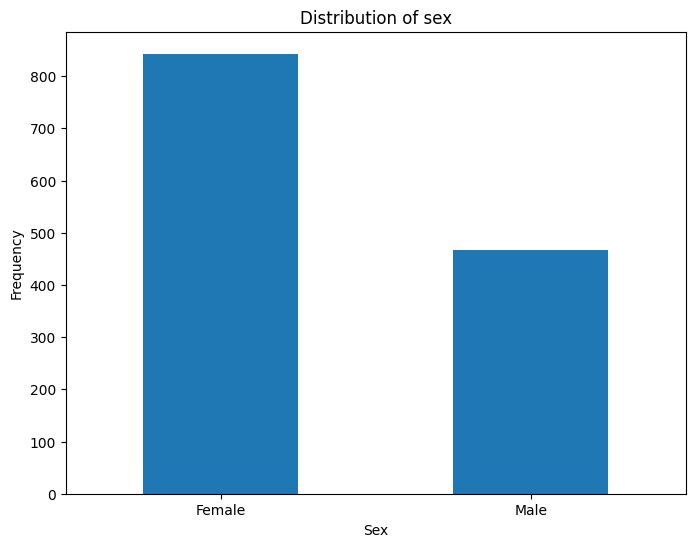

In [20]:
# bar chart 
plt.figure(figsize=(8,6))
df["Sex"].value_counts().sort_index().plot(kind="bar",rot=0)
plt.title("Distribution of sex")
plt.xlabel("Sex")
plt.ylabel("Frequency")
plt.xticks(ticks=[0,1], labels=["Female","Male"])
plt.show()


In [21]:
print("------Analyzing Pclass------")

------Analyzing Pclass------


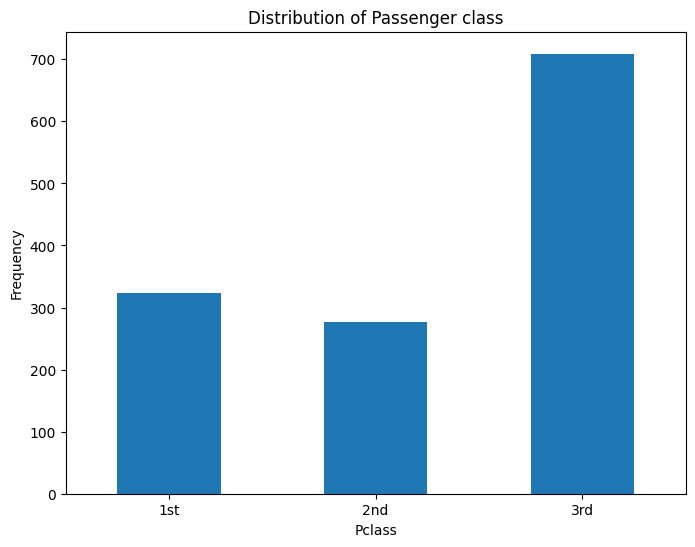

In [22]:
plt.figure(figsize=(8,6))
df["Pclass"].value_counts().sort_index().plot(kind="bar",rot=0)
plt.title("Distribution of Passenger class")
plt.xlabel("Pclass")
plt.ylabel("Frequency")
plt.xticks(ticks=[0,1,2],labels=['1st','2nd','3rd'])
plt.show()


In [23]:
print("--------Analyzing Embark---------")

--------Analyzing Embark---------


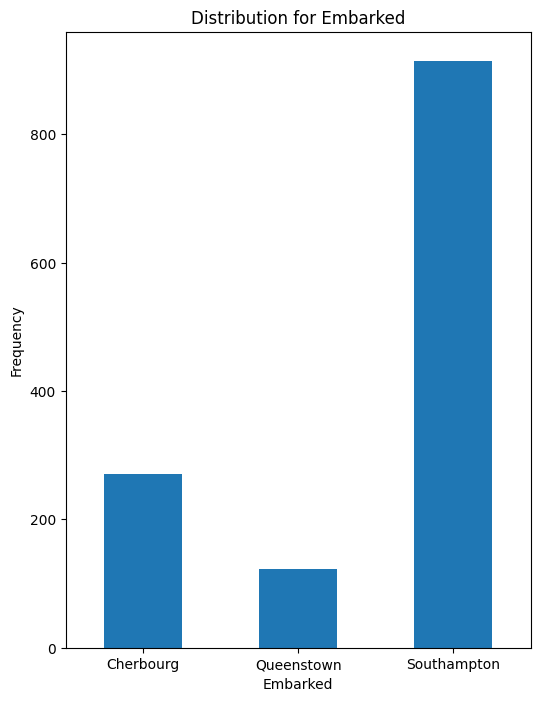

In [24]:
plt.figure(figsize=(6,8))
df["Embarked"].value_counts().sort_index().plot(kind="bar",rot=0)
plt.title("Distribution for Embarked")
plt.xlabel("Embarked")
plt.ylabel("Frequency")
plt.xticks(ticks=[0.0,1.0,2.0],labels=["Cherbourg","Queenstown","Southampton"])
plt.show()

## **2.2.2 Analyse the target variable**

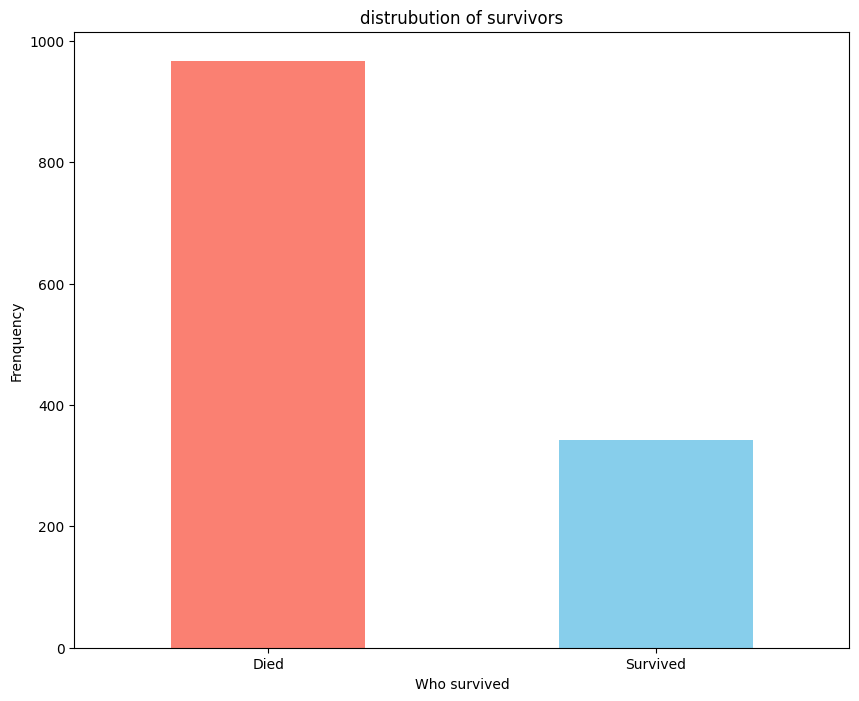

In [25]:
plt.figure(figsize=(10,8))
df["2urvived"].value_counts().sort_index().plot(kind="bar",rot=0,color=['salmon','skyblue'])
plt.title("distrubution of survivors")
plt.xlabel("Who survived")
plt.ylabel("Frenquency")
plt.xticks(ticks=[0,1],labels=["Died","Survived"])
plt.show()


#### Summary of Univariate Analysis Findings:

**Numerical Features:**

* **Age:** The median age of passengers is around 29 years, indicating a central tendency in this range. The presence of newborns and older individuals suggests a wide age range. The age distribution appears roughly normal, although there are notable outliers present.
* **Fare:** The distribution of fare prices is positively skewed, indicating that most passengers paid lower fares, with a tail extending towards higher prices. Outliers are present, representing very expensive tickets. The significant spread in fare values highlights a large disparity in ticket prices.
* **sibsp (Number of Siblings/Spouses Aboard):** The majority of passengers traveled without any siblings or spouses. Among those who did, having one sibling or spouse was the most common. The maximum number of siblings/spouses recorded was 8, suggesting some large family groups.
* **Parch (Number of Parents/Children Aboard):** Similar to `sibsp`, most passengers did not have parents or children on board. When they did, having one parent or child was frequent. The observation that the pattern in `Parch` mirrors `sibsp` suggests a potential correlation between these two features, indicating that passengers traveling with siblings/spouses were also likely to be traveling with parents/children, representing family units.

**Categorical Features:**

* **Sex:** The number of female passengers in the dataset was almost double the number of male passengers.
* **Pclass (Passenger Class):** A significant portion of the passengers traveled in 3rd class. (Note: In the historical context of the Titanic, 3rd class was the lowest class, while 1st was the highest. This might be a specific interpretation or modification in your dataset).
* **Embarked (Port of Embarkation):** The most common port of embarkation for passengers was Southampton ('S'), which was the last port of departure for the Titanic.

**Target Variable (2urvived):**

* The distribution of the target variable reveals that a significant number of passengers did not survive the Titanic disaster. The bar chart showed a higher frequency for the 'Died' category compared to the 'Survived' category, indicating that the majority of passengers in this dataset perished.

## **2.2.3 Outlier Detection and Analysis**

In [26]:
# --- Outlier Detection using Z-score ---

def identify_zscore_outliers(df, column, threshold=3):
    """Identifies outliers in a column using the Z-score method."""
    mean = df[column].mean()
    std = df[column].std()
    # z_scores = np.abs((df[column] - mean) / std)
    z_scores=(df[column] - mean) / std
    outlier_indices = df[z_scores >threshold].index
    return outlier_indices

print("--- Outlier Detection using Z-score ---")

# For Age
age_zscore_outliers_indices = identify_zscore_outliers(df, 'Age')
print(f"Number of Age outliers (Z-score > +/- 3): {len(age_zscore_outliers_indices)}")
if not age_zscore_outliers_indices.empty:
    print("Outlier Ages:")
    print(df.loc[age_zscore_outliers_indices, 'Age'])

# For Fare
fare_zscore_outliers_indices = identify_zscore_outliers(df, 'Fare')
print(f"\nNumber of Fare outliers (Z-score > +/- 3): {len(fare_zscore_outliers_indices)}")
if not fare_zscore_outliers_indices.empty:
    print("Outlier Fares:")
    print(df.loc[fare_zscore_outliers_indices, 'Fare'])

# --- Outlier Detection using Box Plot (IQR Method) ---

def identify_iqr_outliers(df, column):
    """Identifies outliers in a column using the IQR method (box plot)."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_indices = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
    return outlier_indices

print("\n--- Outlier Detection using Box Plot (IQR Method) ---")

# For Age
age_iqr_outliers_indices = identify_iqr_outliers(df, 'Age')
print(f"Number of Age outliers (IQR method): {len(age_iqr_outliers_indices)}")
if not age_iqr_outliers_indices.empty:
    print("Outlier Ages (IQR):")
    print(df.loc[age_iqr_outliers_indices, 'Age'])

# For Fare
fare_iqr_outliers_indices = identify_iqr_outliers(df, 'Fare')
print(f"\nNumber of Fare outliers (IQR method): {len(fare_iqr_outliers_indices)}")
if not fare_iqr_outliers_indices.empty:
    print("Outlier Fares (IQR):")
    print(df.loc[fare_iqr_outliers_indices, 'Fare'])

print("\n--- Note on Interpretation ---")
print(" the IQR method (used in box plots) is generally more robust for identifying outliers. Compare the number and values of outliers identified by both methods for each feature.")

--- Outlier Detection using Z-score ---
Number of Age outliers (Z-score > +/- 3): 8
Outlier Ages:
96     71.0
116    70.5
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
987    76.0
Name: Age, dtype: float64

Number of Fare outliers (Z-score > +/- 3): 38
Outlier Fares:
27      263.0000
88      263.0000
118     247.5208
258     512.3292
299     247.5208
311     262.3750
341     263.0000
377     211.5000
380     227.5250
438     263.0000
527     221.7792
557     227.5250
679     512.3292
689     211.3375
700     227.5250
716     227.5250
730     211.3375
737     512.3292
742     262.3750
779     211.3375
915     262.3750
944     263.0000
950     262.3750
955     262.3750
960     263.0000
965     211.5000
966     211.5000
972     221.7792
1005    221.7792
1033    262.3750
1047    221.7792
1075    247.5208
1093    227.5250
1109    211.5000
1215    211.3375
1234    512.3292
1266    262.3750
1298    211.5000
Name: Fare, dtype: float64

--- Outlier Detection using Box Plot (IQR Me

## **2.3 Bivariante Analysis**

In [27]:
print("Explore the relationships between pairs of features. Focus on:")

Explore the relationships between pairs of features. Focus on:


## **2.3.1 Numerical vs. Numerical**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Figure size 1000x800 with 0 Axes>

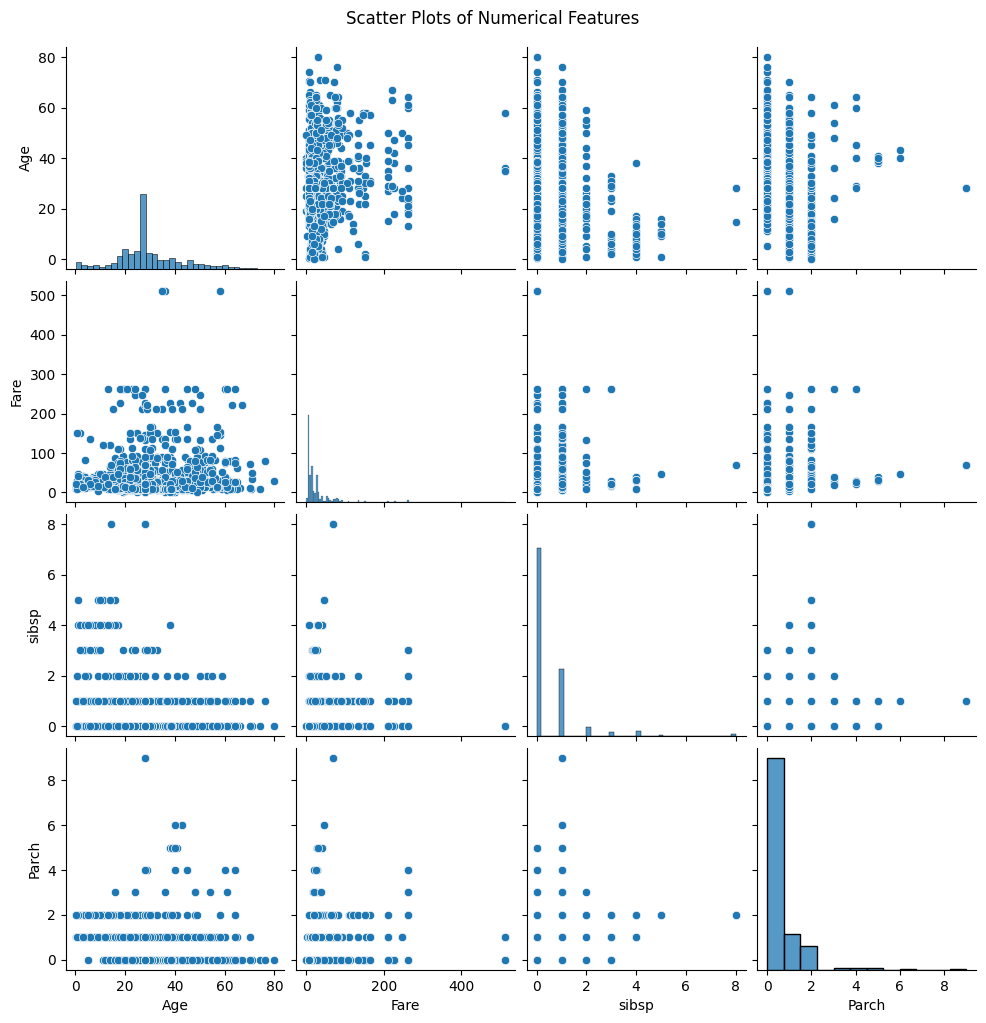

In [28]:
numerical_features=["Age","Fare","sibsp","Parch"]
plt.figure(figsize=(10,8))
sns.pairplot(df[numerical_features])
plt.suptitle("Scatter Plots of Numerical Features", y=1.02)
plt.show()

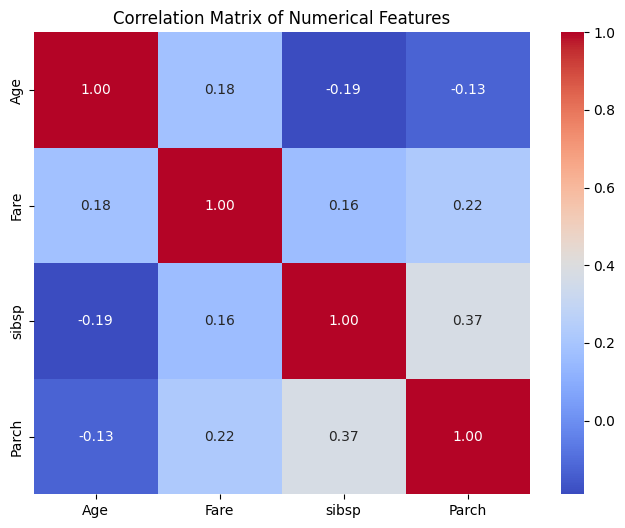

In [29]:
# --- Bivariate Analysis: Correlation Analysis ---

# Calculate the correlation matrix
correlation_matrix = df[numerical_features].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()


## **2.3.2 Categorical vs. Categorical**


--- Relationship between Sex and Pclass ---

Cross-Tabulation:
Pclass    1    2    3
Sex                  
0       179  171  493
1       144  106  216

Cross-Tabulation (Normalized by Index):
Pclass         1         2         3
Sex                                 
0       0.212337  0.202847  0.584816
1       0.309013  0.227468  0.463519


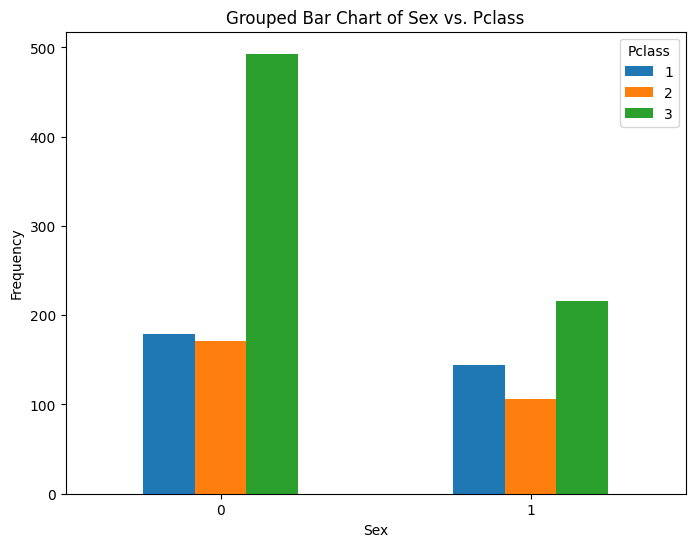

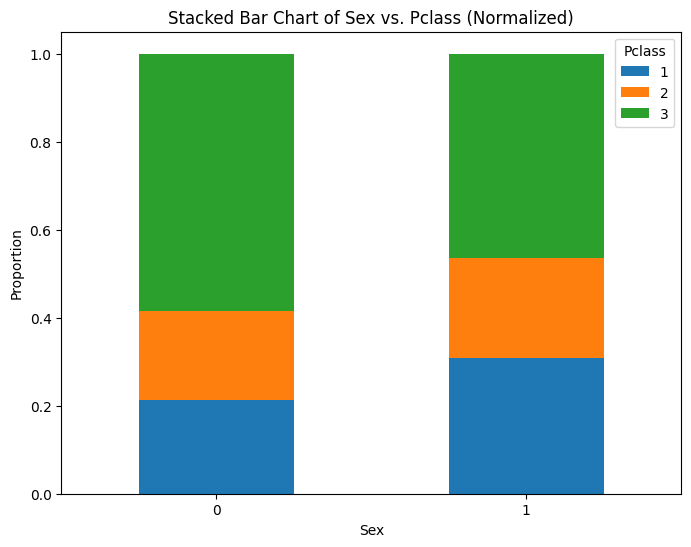


--- Relationship between Sex and Embarked ---

Cross-Tabulation:
Embarked  0.0  1.0  2.0
Sex                    
0         157   63  623
1         113   60  291

Cross-Tabulation (Normalized by Index):
Embarked       0.0       1.0       2.0
Sex                                   
0         0.186240  0.074733  0.739027
1         0.243534  0.129310  0.627155


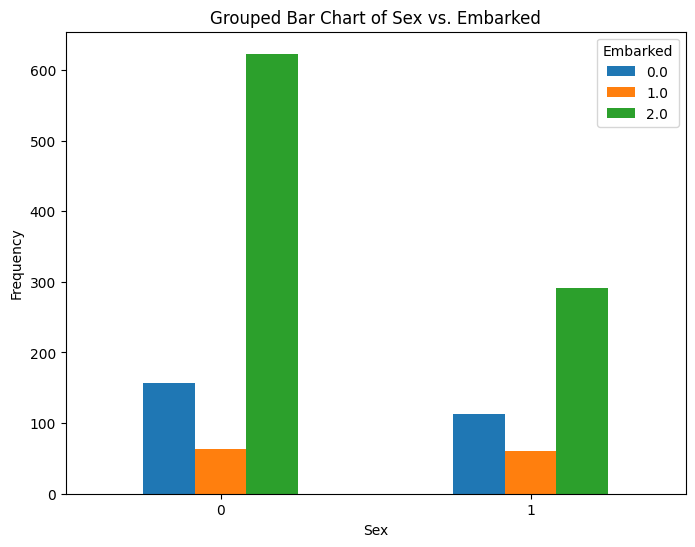

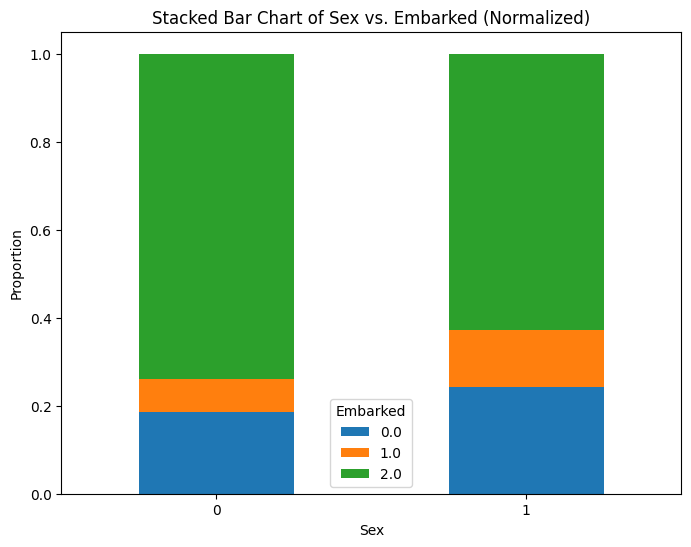


--- Relationship between Pclass and Embarked ---

Cross-Tabulation:
Embarked  0.0  1.0  2.0
Pclass                 
1         141    3  177
2          28    7  242
3         101  113  495

Cross-Tabulation (Normalized by Index):
Embarked       0.0       1.0       2.0
Pclass                                
1         0.439252  0.009346  0.551402
2         0.101083  0.025271  0.873646
3         0.142454  0.159379  0.698166


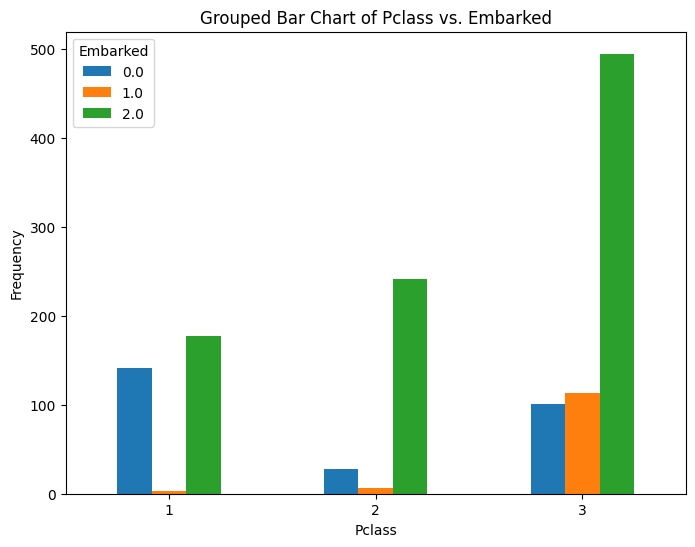

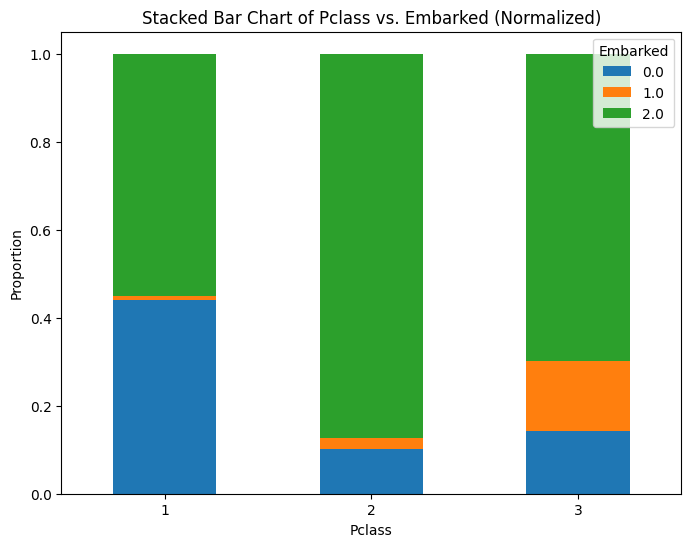

In [30]:
# Assuming your DataFrame is named 'df'

# --- Bivariate Analysis: Categorical vs. Categorical ---

categorical_features = ['Sex', 'Pclass', 'Embarked']

# Iterate through all pairs of categorical features
for i in range(len(categorical_features)):
    for j in range(i + 1, len(categorical_features)):
        feature1 = categorical_features[i]
        feature2 = categorical_features[j]

        print(f"\n--- Relationship between {feature1} and {feature2} ---")

        # Cross-Tabulation
        cross_tab = pd.crosstab(df[feature1], df[feature2])
        print("\nCross-Tabulation:")
        print(cross_tab)

        # Normalized Cross-Tabulation (Proportions)
        cross_tab_norm = pd.crosstab(df[feature1], df[feature2], normalize='index')
        print("\nCross-Tabulation (Normalized by Index):")
        print(cross_tab_norm)

        # Grouped Bar Chart
        cross_tab.plot(kind='bar', figsize=(8, 6), rot=0)
        plt.title(f'Grouped Bar Chart of {feature1} vs. {feature2}')
        plt.xlabel(feature1)
        plt.ylabel('Frequency')
        plt.legend(title=feature2)
        plt.show()

        # Stacked Bar Chart
        cross_tab_norm.plot(kind='bar', stacked=True, figsize=(8, 6), rot=0)
        plt.title(f'Stacked Bar Chart of {feature1} vs. {feature2} (Normalized)')
        plt.xlabel(feature1)
        plt.ylabel('Proportion')
        plt.legend(title=feature2)
        plt.show()

## **2.3.3 Numerical vs. Categorical**


--- Analyzing Age vs. Sex ---


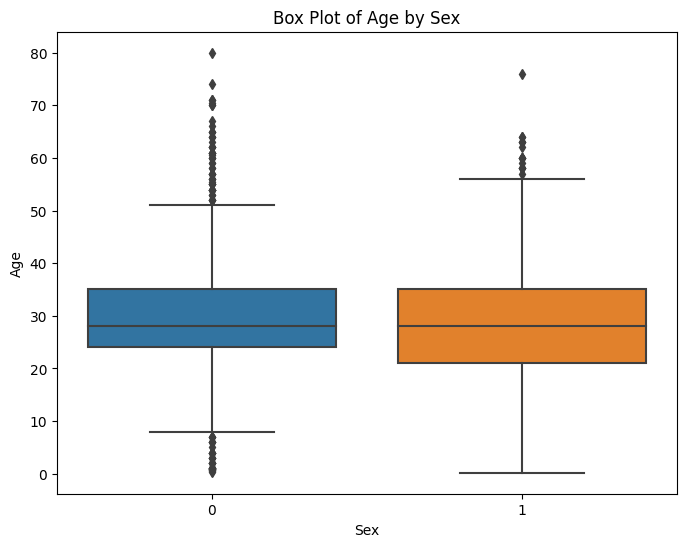

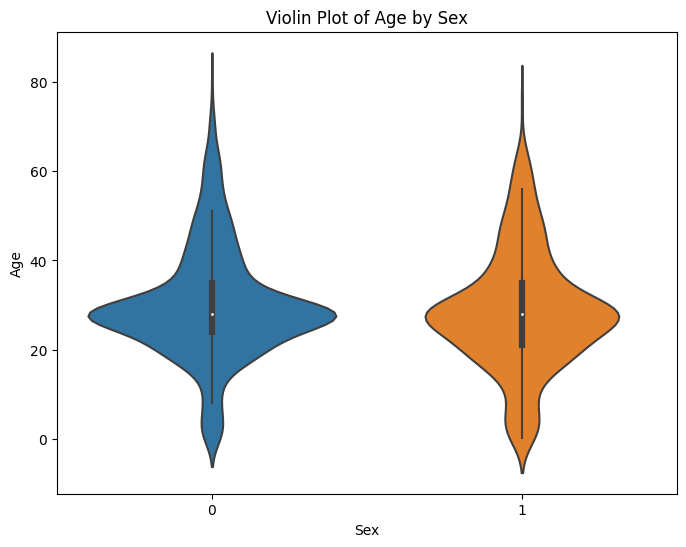


Mean and Median of Age by Sex:
          mean  median
Sex                   
0    30.017888    28.0
1    28.572082    28.0

--- Analyzing Age vs. Pclass ---


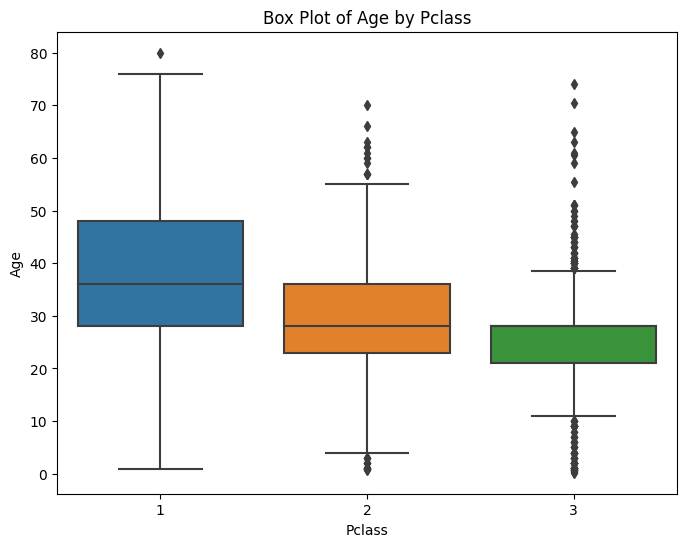

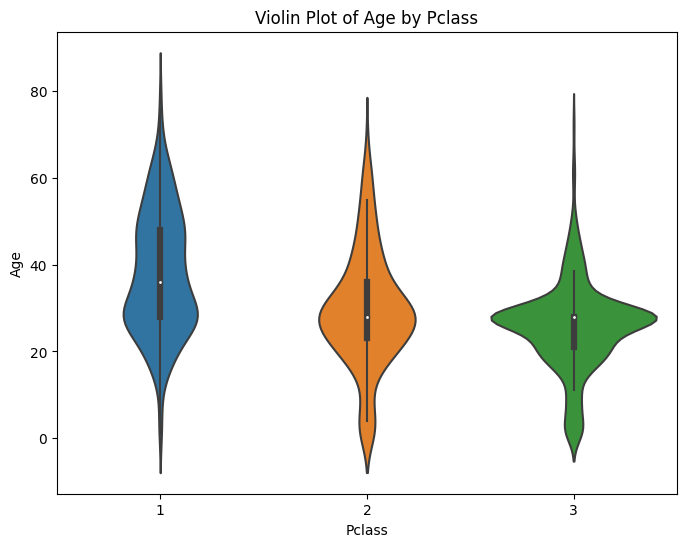


Mean and Median of Age by Pclass:
             mean  median
Pclass                   
1       37.812446    36.0
2       29.419675    28.0
3       25.750353    28.0

--- Analyzing Age vs. Embarked ---


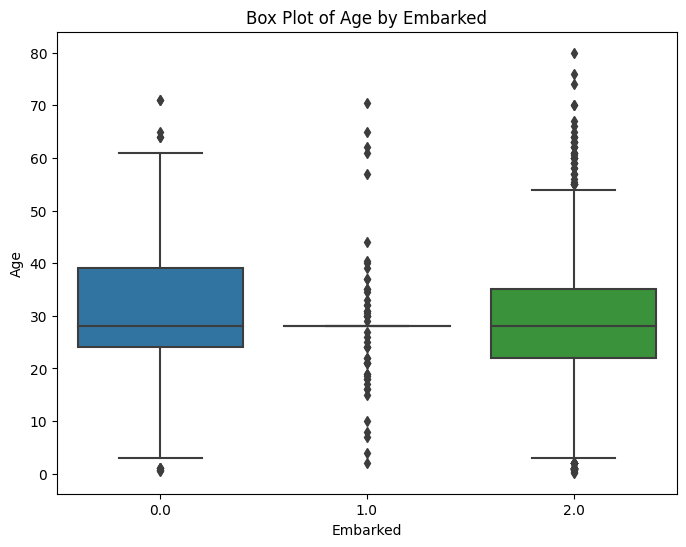

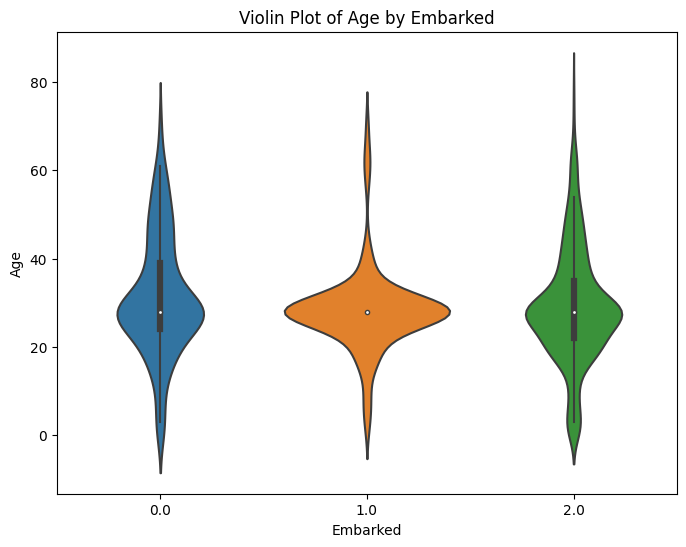


Mean and Median of Age by Embarked:
               mean  median
Embarked                   
0.0       31.401556    28.0
1.0       28.256098    28.0
2.0       29.065372    28.0

--- Analyzing Fare vs. Sex ---


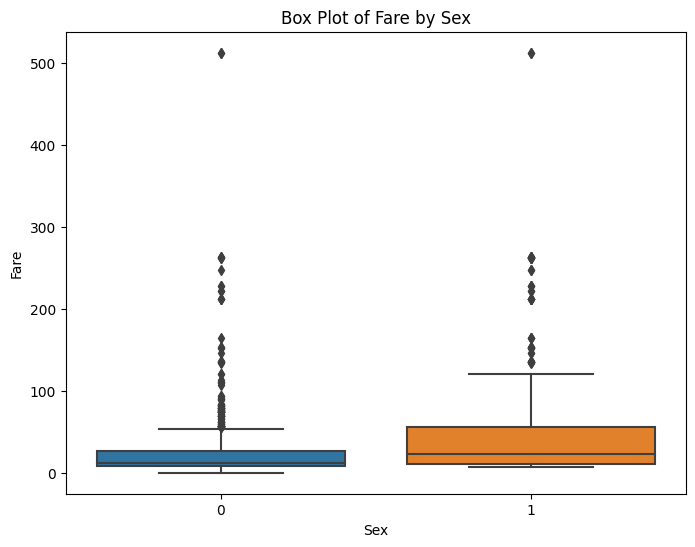

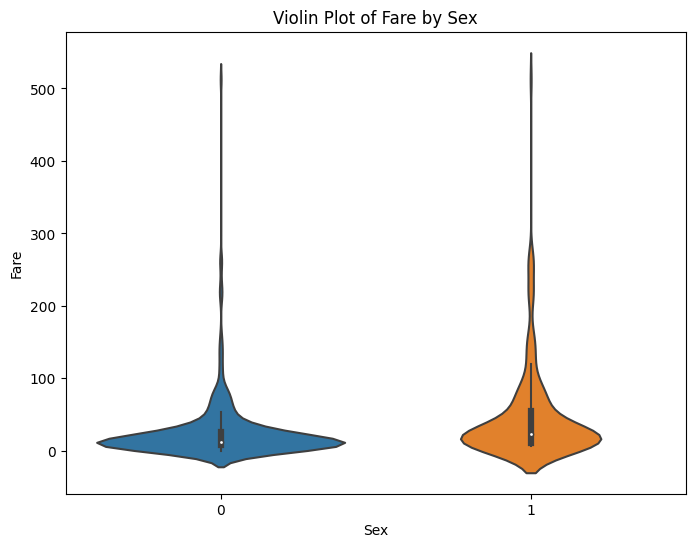


Mean and Median of Fare by Sex:
          mean  median
Sex                   
0    26.140721  12.275
1    46.198097  23.000

--- Analyzing Fare vs. Pclass ---


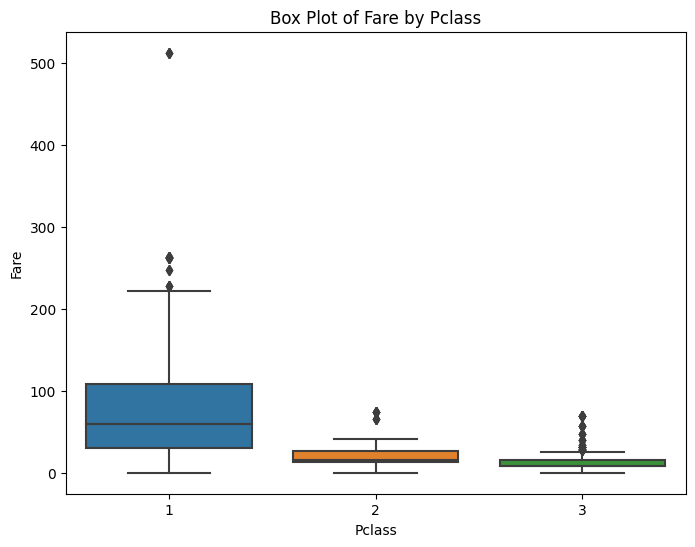

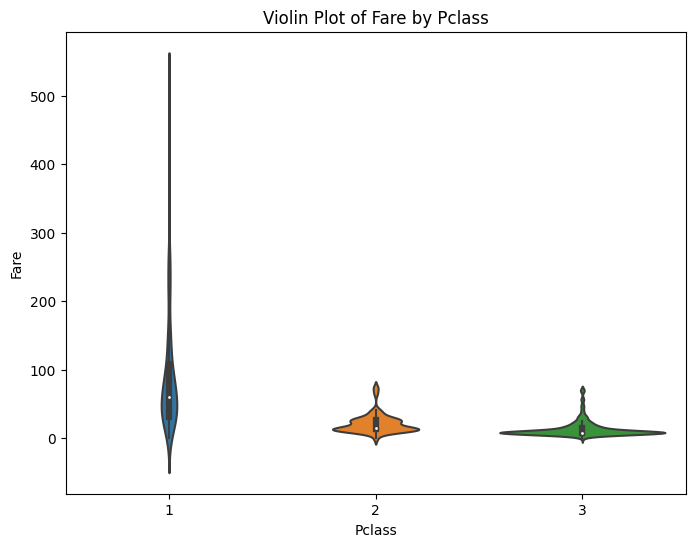


Mean and Median of Fare by Pclass:
             mean   median
Pclass                    
1       87.508992  60.0000
2       21.179196  15.0458
3       13.304513   8.0500

--- Analyzing Fare vs. Embarked ---


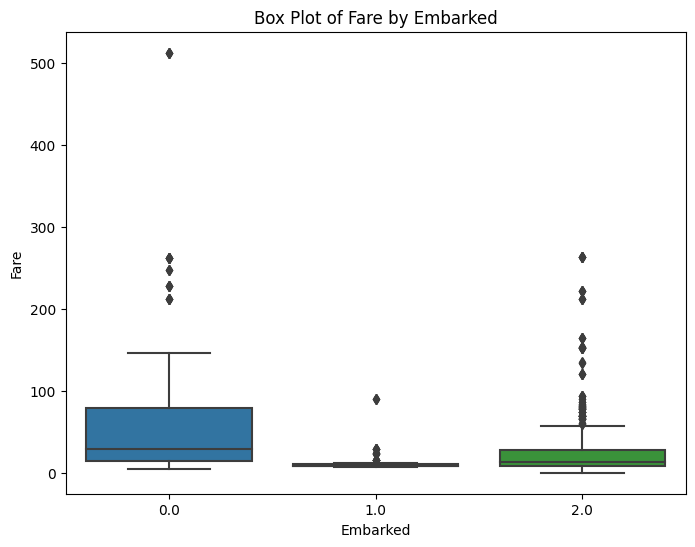

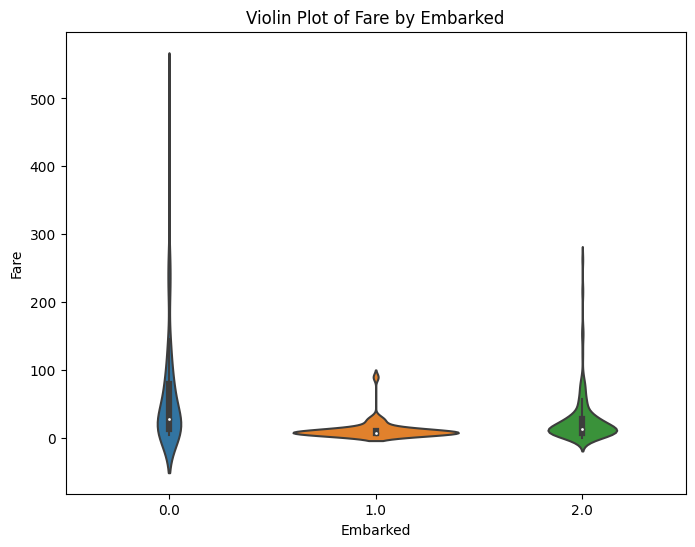


Mean and Median of Fare by Embarked:
               mean    median
Embarked                     
0.0       62.336267  28.51875
1.0       12.409012   7.75000
2.0       27.404639  13.00000

--- Analyzing sibsp vs. Sex ---


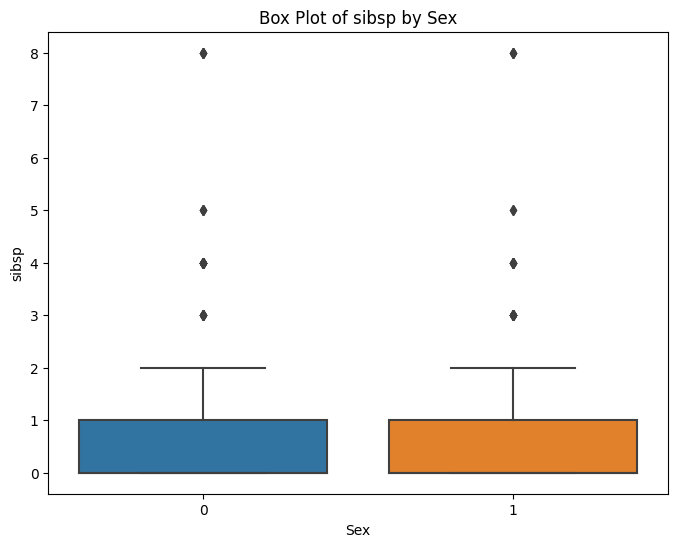

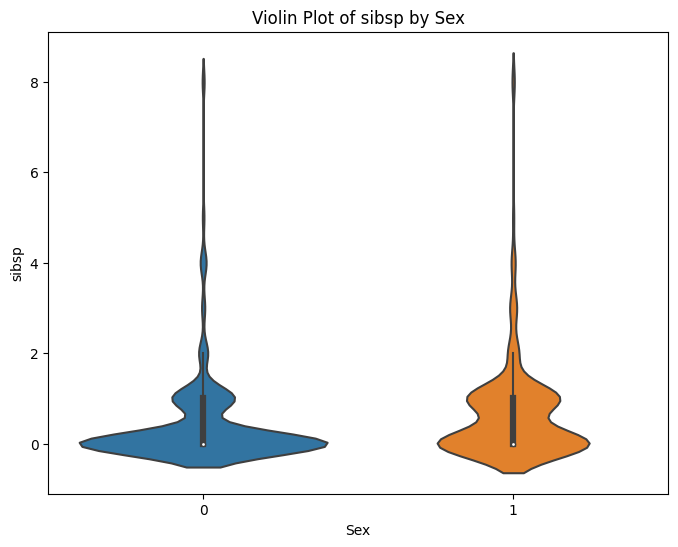


Mean and Median of sibsp by Sex:
         mean  median
Sex                  
0    0.413998     0.0
1    0.652361     0.0

--- Analyzing sibsp vs. Pclass ---


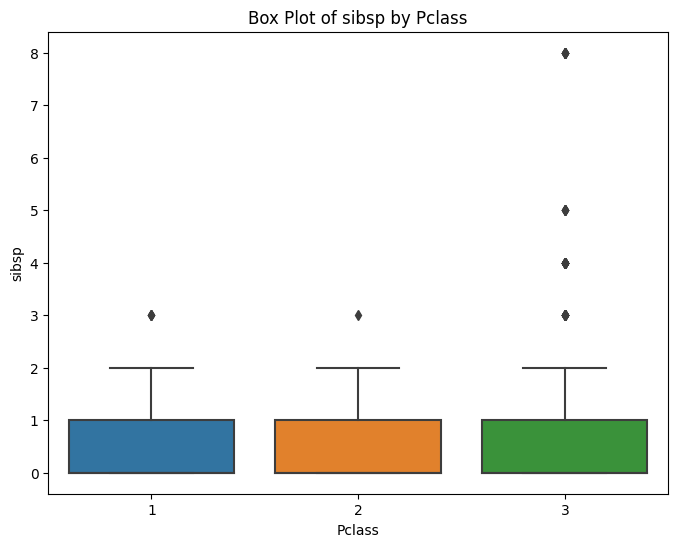

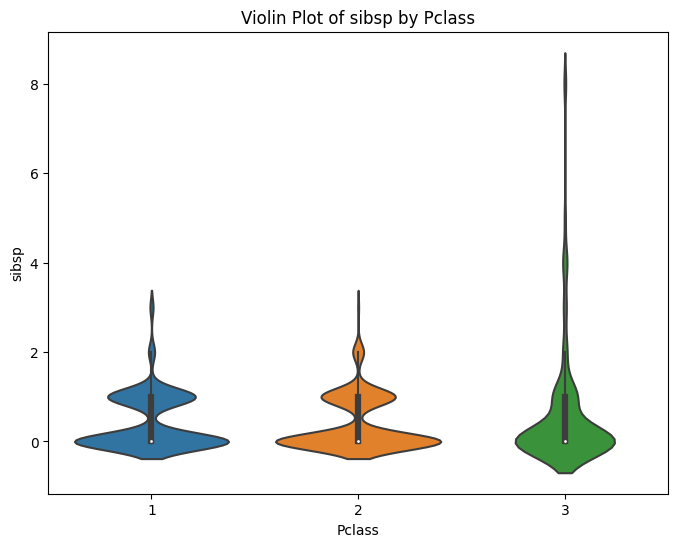


Mean and Median of sibsp by Pclass:
            mean  median
Pclass                  
1       0.436533     0.0
2       0.393502     0.0
3       0.568406     0.0

--- Analyzing sibsp vs. Embarked ---


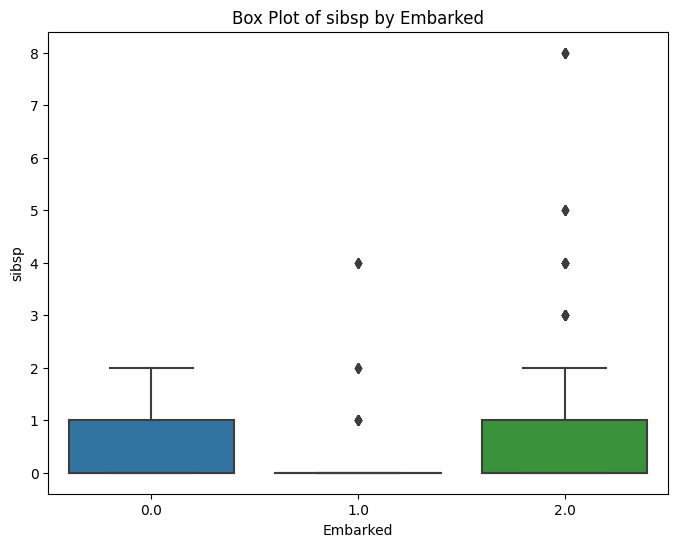

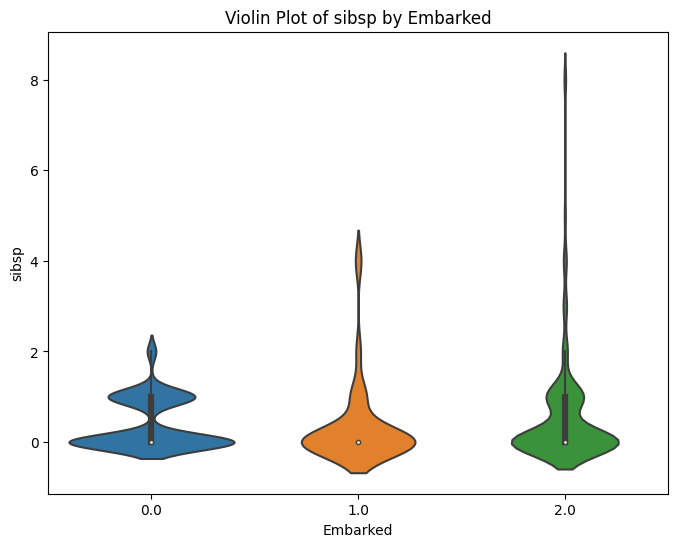


Mean and Median of sibsp by Embarked:
              mean  median
Embarked                  
0.0       0.400000     0.0
1.0       0.341463     0.0
2.0       0.550328     0.0

--- Analyzing Parch vs. Sex ---


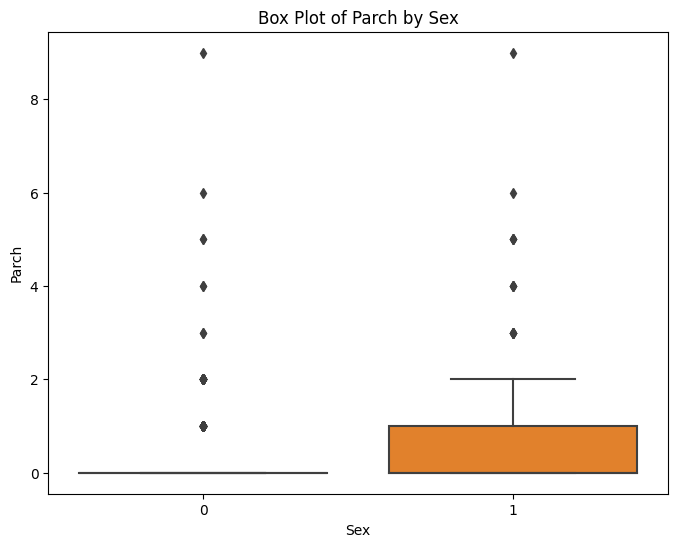

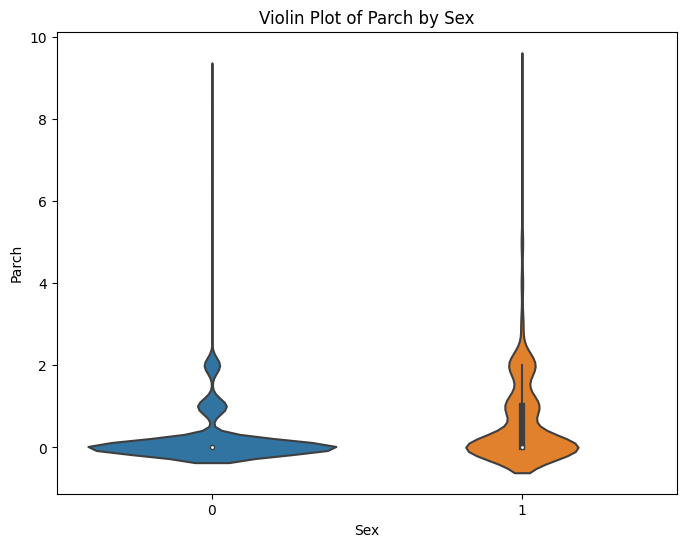


Mean and Median of Parch by Sex:
         mean  median
Sex                  
0    0.247924     0.0
1    0.633047     0.0

--- Analyzing Parch vs. Pclass ---


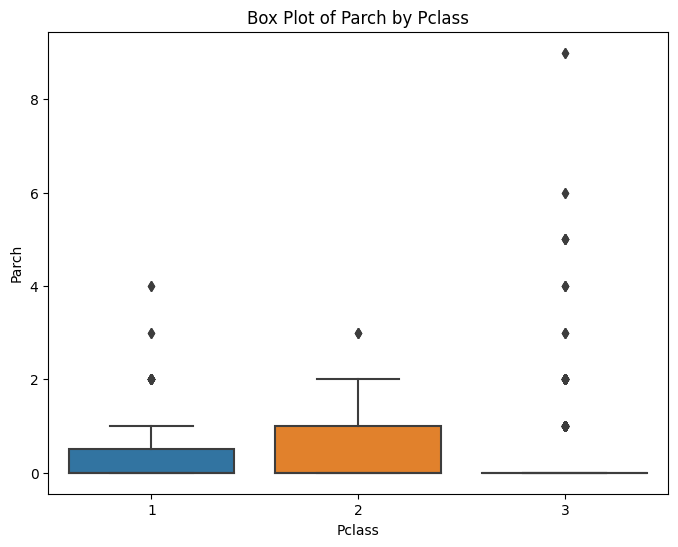

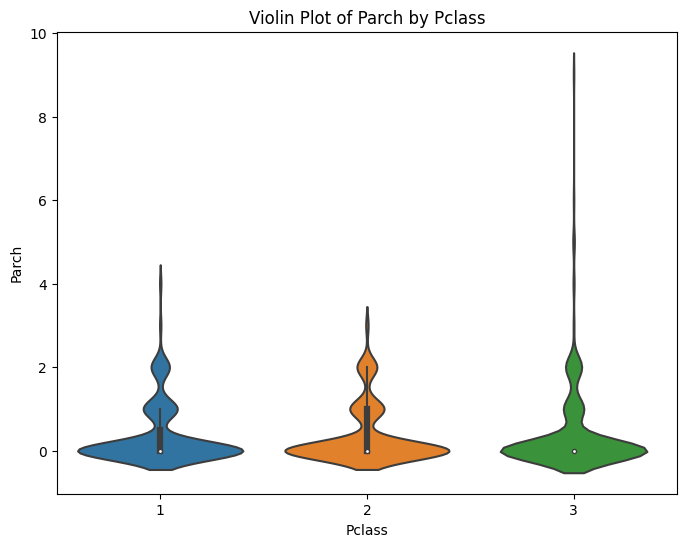


Mean and Median of Parch by Pclass:
            mean  median
Pclass                  
1       0.365325     0.0
2       0.368231     0.0
3       0.400564     0.0

--- Analyzing Parch vs. Embarked ---


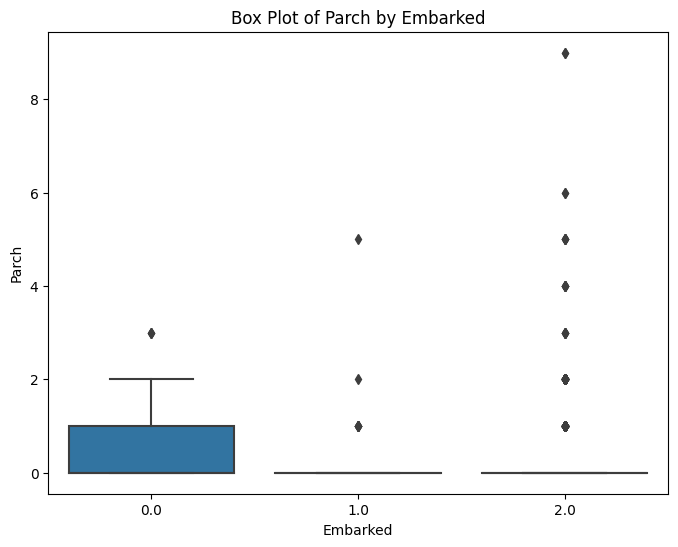

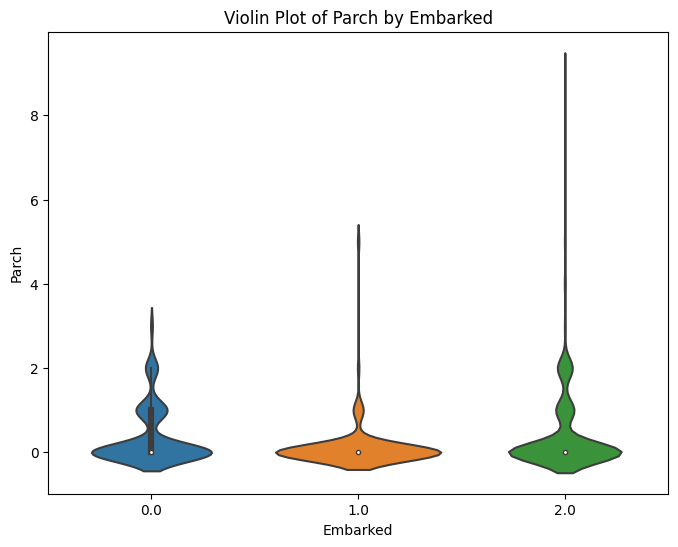


Mean and Median of Parch by Embarked:
              mean  median
Embarked                  
0.0       0.370370     0.0
1.0       0.113821     0.0
2.0       0.426696     0.0


In [31]:
# Assuming your DataFrame is named 'df'

numerical_features = ['Age', 'Fare', 'sibsp', 'Parch']
categorical_features = ['Sex', 'Pclass', 'Embarked']

for num_feature in numerical_features:
    for cat_feature in categorical_features:
        print(f"\n--- Analyzing {num_feature} vs. {cat_feature} ---")

        # Box Plot
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=cat_feature, y=num_feature, data=df)
        plt.title(f'Box Plot of {num_feature} by {cat_feature}')
        plt.xlabel(cat_feature)
        plt.ylabel(num_feature)
        plt.show()

        # Violin Plot
        plt.figure(figsize=(8, 6))
        sns.violinplot(x=cat_feature, y=num_feature, data=df)
        plt.title(f'Violin Plot of {num_feature} by {cat_feature}')
        plt.xlabel(cat_feature)
        plt.ylabel(num_feature)
        plt.show()

        # Compare Means and Medians
        grouped_stats = df.groupby(cat_feature)[num_feature].agg(['mean', 'median'])
        print(f"\nMean and Median of {num_feature} by {cat_feature}:")
        print(grouped_stats)

## **2.3.4 Numerical vs. Target**


--- Analyzing Survival vs. Age ---


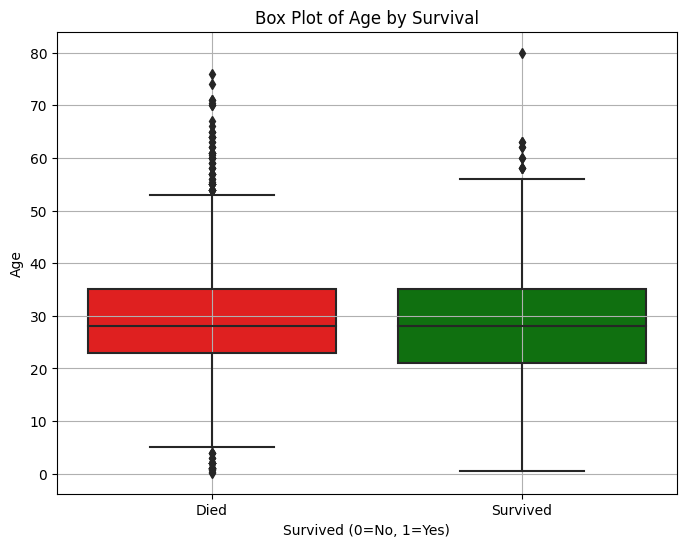

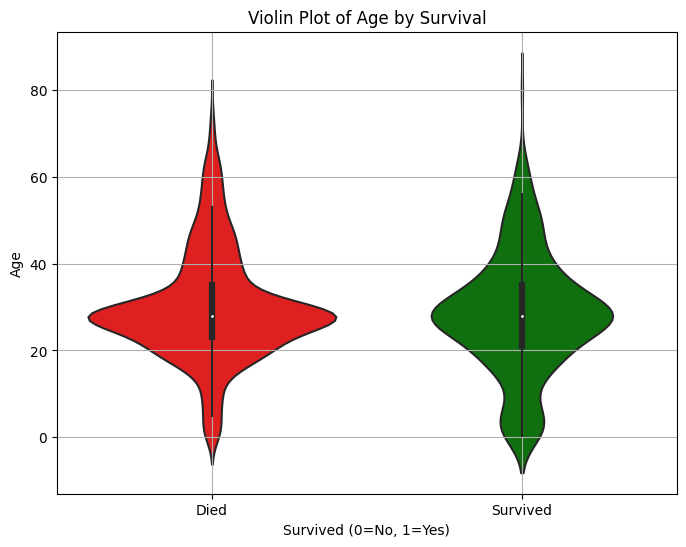


Mean and Median of Age by Survival:
               mean  median
2urvived                   
0         29.931748    28.0
1         28.291433    28.0

--- Analyzing Survival vs. Fare ---


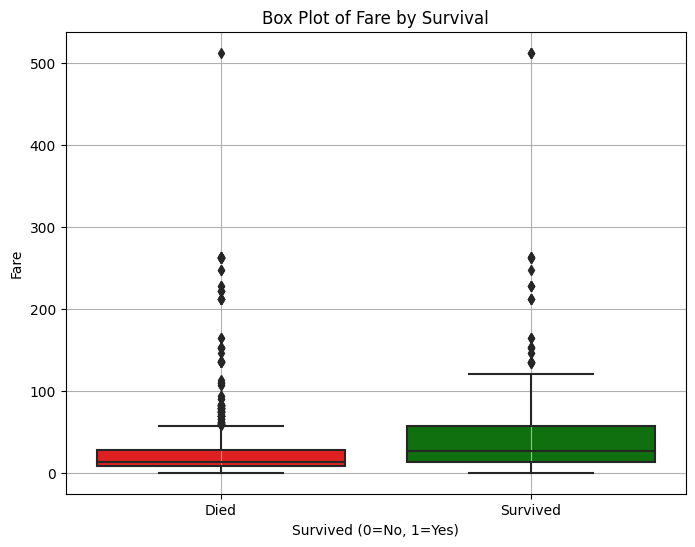

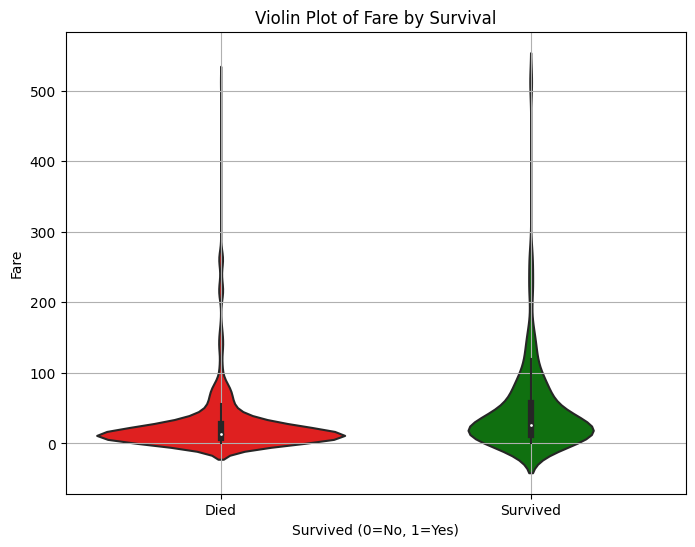


Mean and Median of Fare by Survival:
               mean  median
2urvived                   
0         27.935586    13.0
1         48.395408    26.0

--- Analyzing Survival vs. sibsp ---


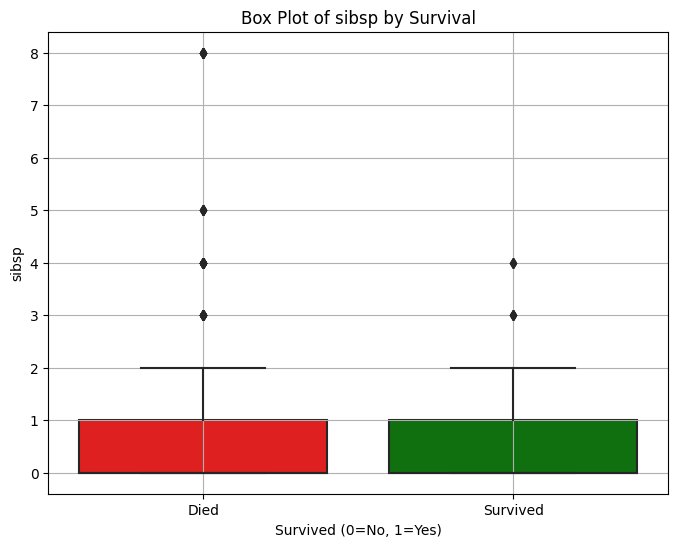

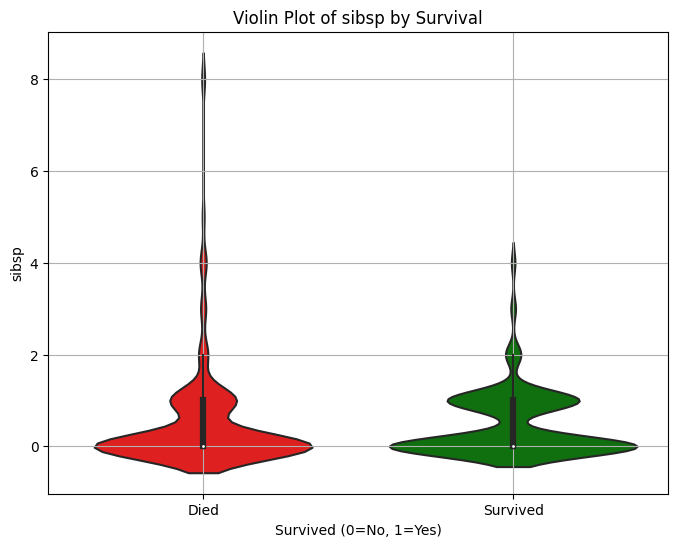


Mean and Median of sibsp by Survival:
              mean  median
2urvived                  
0         0.507756     0.0
1         0.473684     0.0

--- Analyzing Survival vs. Parch ---


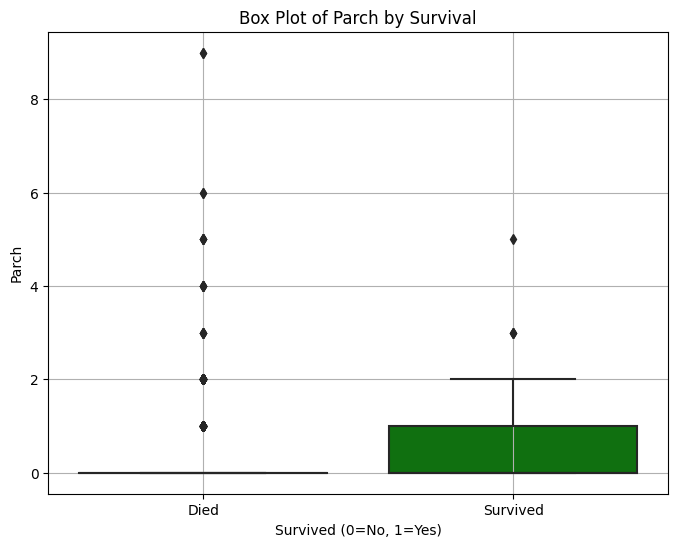

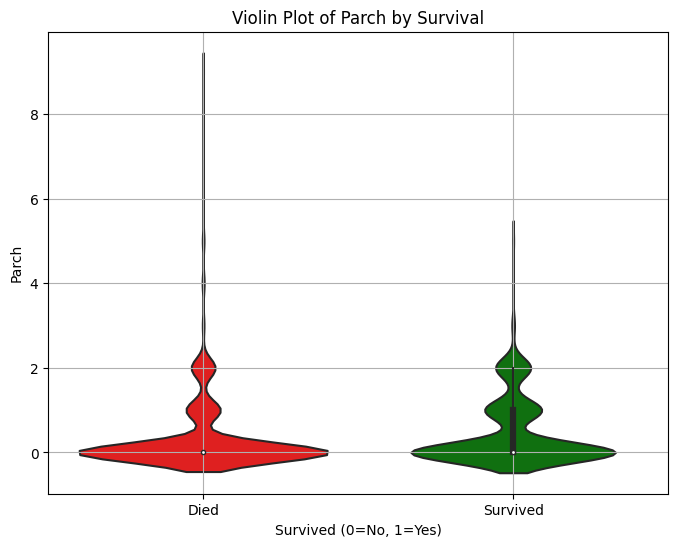


Mean and Median of Parch by Survival:
              mean  median
2urvived                  
0         0.356774     0.0
1         0.464912     0.0


In [32]:
for feature in numerical_features:
    print(f"\n--- Analyzing Survival vs. {feature} ---")

    # Box Plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='2urvived', y=feature, data=df, palette={0: 'red', 1: 'green'})
    plt.title(f'Box Plot of {feature} by Survival')
    plt.xlabel('Survived (0=No, 1=Yes)')
    plt.ylabel(feature)
    plt.xticks([0, 1], ['Died', 'Survived'])
    plt.grid(True)
    plt.show()

    # Violin Plot
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='2urvived', y=feature, data=df, palette={0: 'red', 1: 'green'})
    plt.title(f'Violin Plot of {feature} by Survival')
    plt.xlabel('Survived (0=No, 1=Yes)')
    plt.ylabel(feature)
    plt.xticks([0, 1], ['Died', 'Survived'])
    plt.grid(True)
    plt.show()

    # Compare Means and Medians
    grouped_stats = df.groupby('2urvived')[feature].agg(['mean', 'median'])
    print(f"\nMean and Median of {feature} by Survival:")
    print(grouped_stats)

## **2.3.4 target vs. Categorical**


--- Analyzing Survival vs. Sex ---


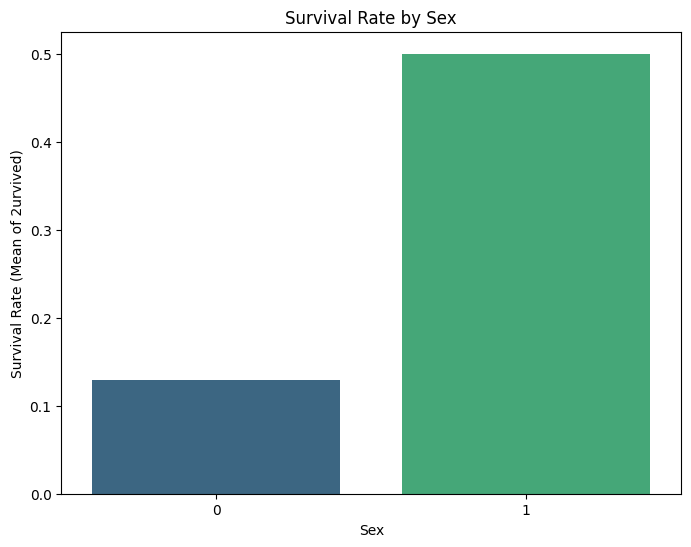


Cross-Tabulation (Counts):
2urvived    0    1
Sex               
0         734  109
1         233  233

Cross-Tabulation (Normalized by Index - Survival Proportions):
2urvived       0       1
Sex                     
0         0.8707  0.1293
1         0.5000  0.5000

--- Analyzing Survival vs. Pclass ---


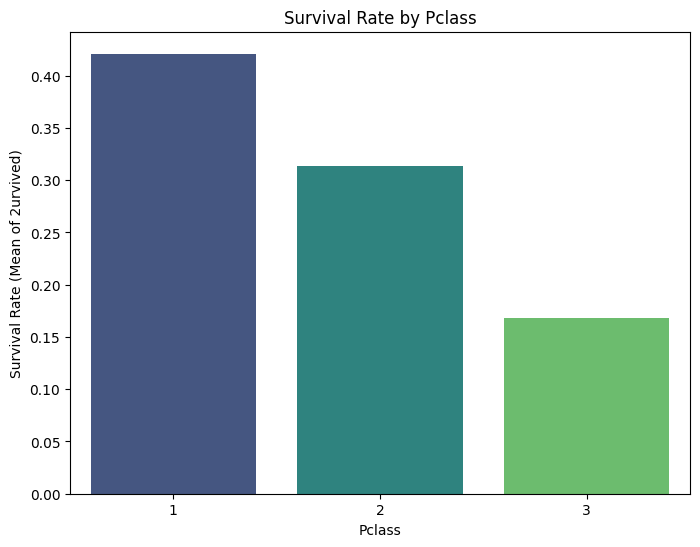


Cross-Tabulation (Counts):
2urvived    0    1
Pclass            
1         187  136
2         190   87
3         590  119

Cross-Tabulation (Normalized by Index - Survival Proportions):
2urvived         0         1
Pclass                      
1         0.578947  0.421053
2         0.685921  0.314079
3         0.832158  0.167842

--- Analyzing Survival vs. Embarked ---


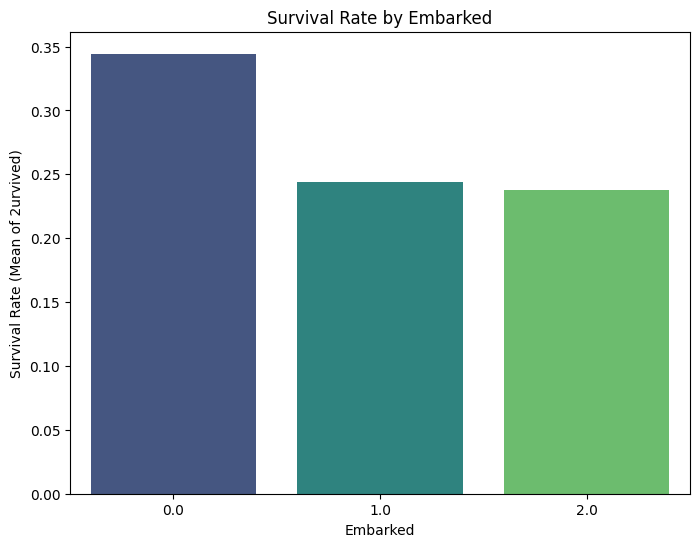


Cross-Tabulation (Counts):
2urvived    0    1
Embarked          
0.0       177   93
1.0        93   30
2.0       697  217

Cross-Tabulation (Normalized by Index - Survival Proportions):
2urvived         0         1
Embarked                    
0.0       0.655556  0.344444
1.0       0.756098  0.243902
2.0       0.762582  0.237418


In [33]:
for feature in categorical_features:
    print(f"\n--- Analyzing Survival vs. {feature} ---")

    # Bar Chart of Survival Rate
    plt.figure(figsize=(8, 6))
    sns.barplot(x=feature, y='2urvived', data=df, errorbar=None, palette='viridis')
    plt.title(f'Survival Rate by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Survival Rate (Mean of 2urvived)')
    plt.show()

    # Cross-Tabulation
    cross_tab = pd.crosstab(df[feature], df['2urvived'])
    print("\nCross-Tabulation (Counts):")
    print(cross_tab)

    # Cross-Tabulation (Normalized by Index to show survival proportions per category)
    cross_tab_norm = pd.crosstab(df[feature], df['2urvived'], normalize='index')
    print("\nCross-Tabulation (Normalized by Index - Survival Proportions):")
    print(cross_tab_norm)